# Lab 2: More ggplot and dplyr

### We encourage you to be active on Piazza, asking and answering homework questions.

### Please feel free to come to office hours (listed on canvas) or email us directly for personal problems/concerns.

### If you do not yet have anaconda/R/Jupyter Notebook working. Please email Professor Tan and he will help you gett in touch with IT specialists for the stats department.



In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.1.1"
-- Attaching packages ------------------------------------------------------------------ tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.0"
Warning message:
"package 'tibble' was built under R version 4.1.1"
Warning message:
"package 'tidyr' was built under R version 4.1.1"
Warning message:
"package 'readr' was built under R version 4.1.1"
Warning message:
"package 'purrr' was built under R version 4.1.1"
Warning message:
"package 'dplyr' was built under R version 4.1.0"
Warning message:
"package 'stringr' was built under R version 4.1.1"
Warning message:
"package 'forcats' was built under R version 4.1.1"
-- Conflicts --------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks 

## Last Lab Review

In [2]:
#review of Diamonds Data set
head(diamonds)
length(diamonds$carat)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


[1] 53940

In [3]:
?diamonds

### Creating Plots
`ggplot(data = <data>) + 
   geom_<graph_type>(mapping = aes (<mapping>))`

### Exercise
Create a boxplot of `price' grouped by the levels in the `cut' variable.

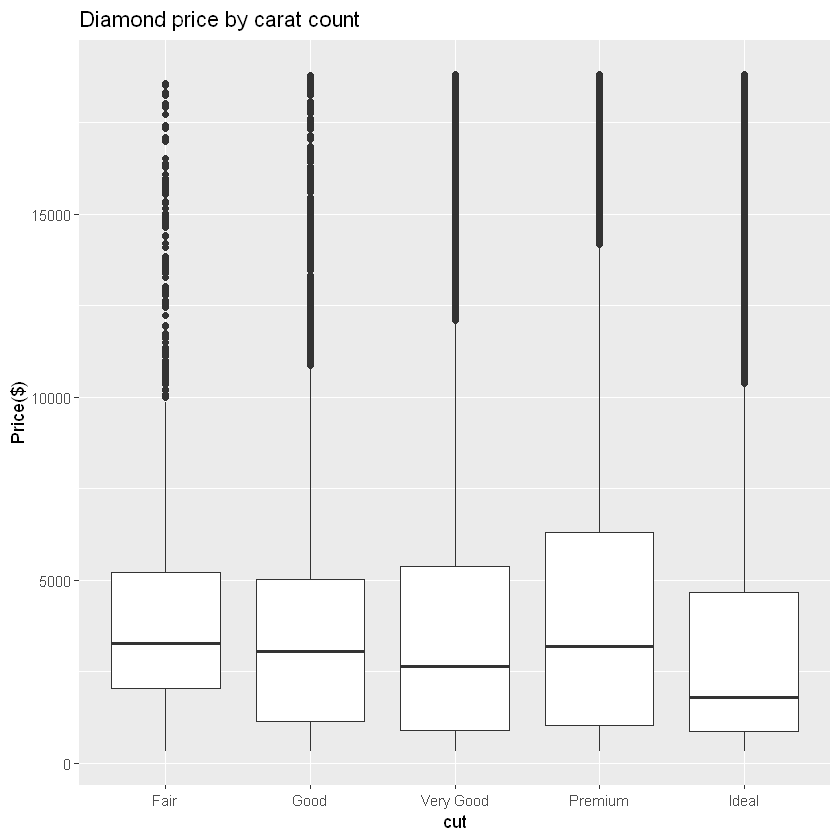

In [4]:
# boxplot helps to visualize the variability of a price for each cut
ggplot(data = diamonds) + 
    geom_boxplot(mapping = aes(x = cut, y = price)) +
    labs(x = 'cut', y = 'Price($)') + 
    ggtitle('Diamond price by carat count')

### Facets
**Facets** are splitting the plots into subsections by categorical or discrete variables.

Code: `+facet_wrap(~ \<how you want to section the groups>, nrows = #)`

We can also make a grid by splitting by two variables.

Code: `+facet_grid(\<Var_1> ~ \<Var_2>)`

You can also put a period "." instead of a variable if you want to just plot on one variable. (this will stretch either the row or columns out to fill the whole space)

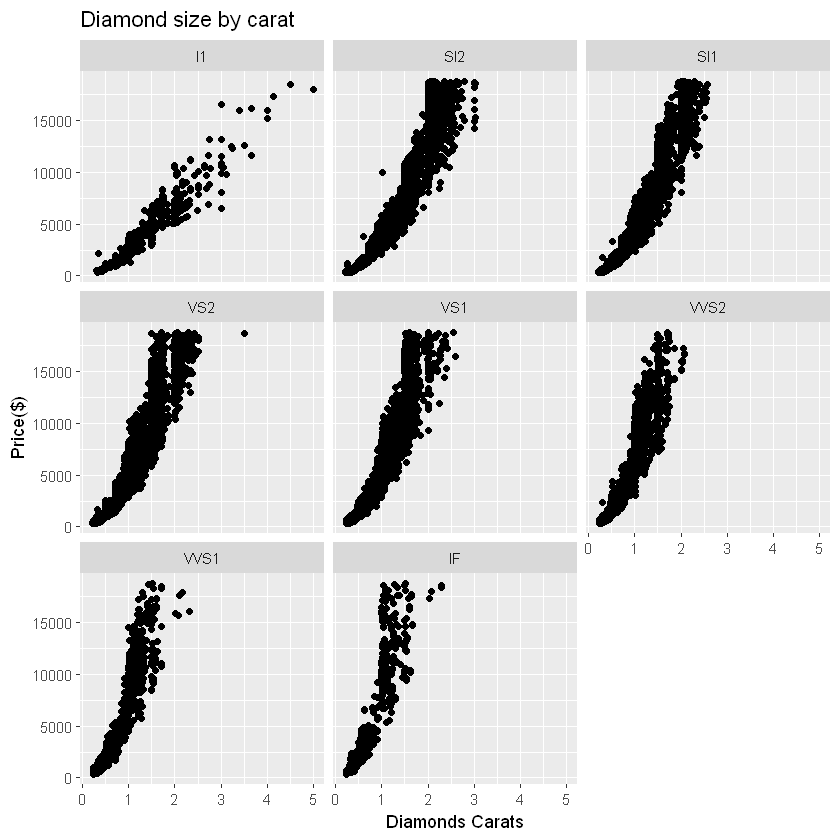

In [5]:
#facet
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('Diamond size by carat') + 
    facet_wrap(~clarity) 


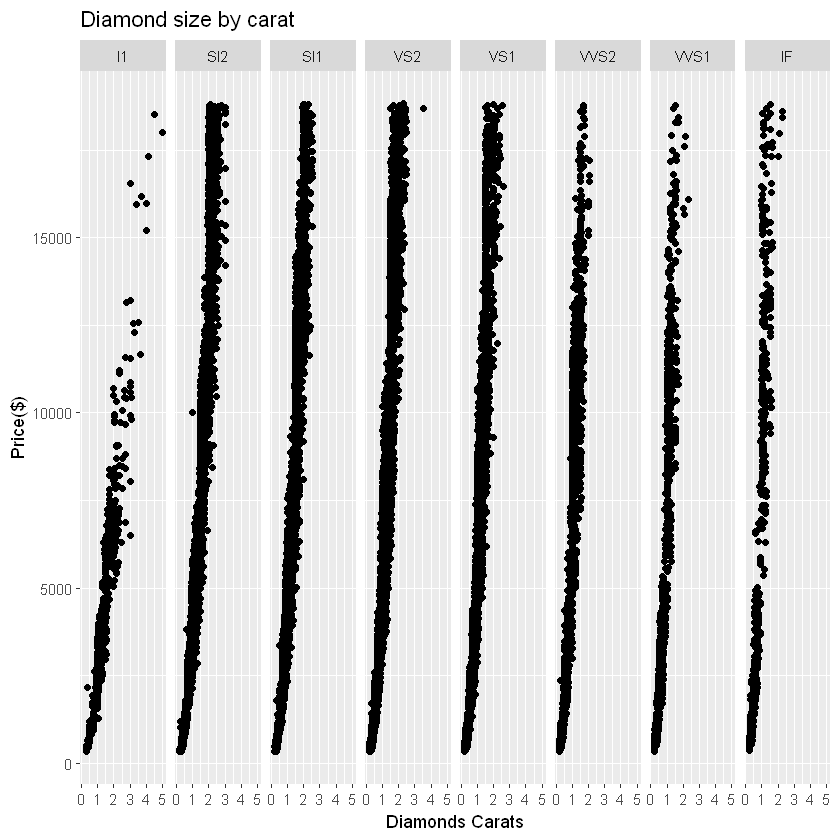

In [6]:
#tall facet
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('Diamond size by carat') + 
    facet_grid(.~clarity) 


### Exercise:
Make a this same scatter plot but seperate the data by both cut and clarity.

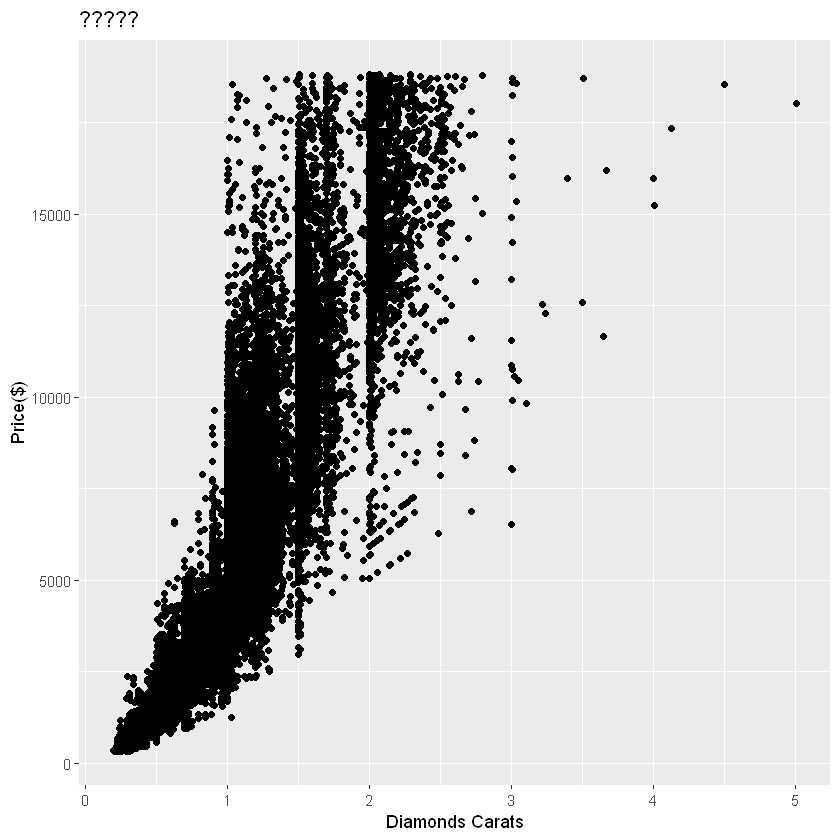

In [7]:
#grid on cut and clarity
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('?????') #+ 
    #??????


## Subset generation

In [8]:
rand_idx = floor(runif(1000, min=1, max=dim(diamonds)[1]))
dm = diamonds[rand_idx, ]
print(names(dm))

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      


In [9]:
cat("diamonds: ", dim(diamonds)[1], '\n')
cat("dm: ", dim(dm)[1])

diamonds:  53940 
dm:  1000

## geom_smooth & stacking plots
    So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



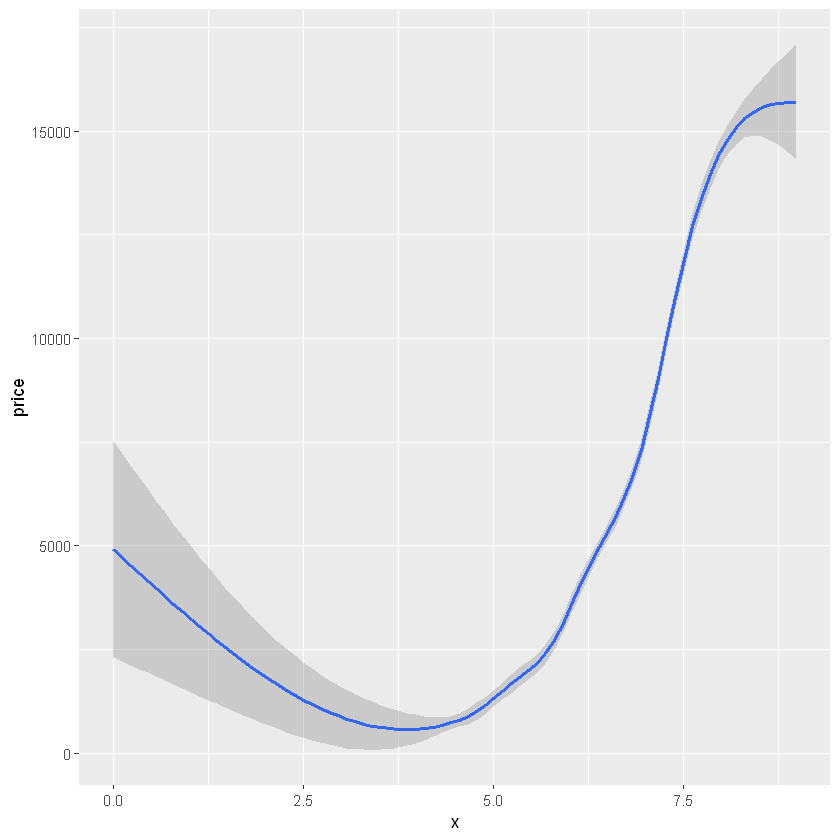

In [10]:
#notice that variables are not just for holding numbers/vectors/strings, but they can also hold entire graphs.
p1 = ggplot(data = dm) + 
    geom_smooth(mapping = aes(x = x, y = price))
print(p1)

This is helpful to see the overall trend of the dm subset of the diamonds dataset. However, how do we know we can trust it, and that it is acutrate? 

Lets plot the scatter plot over it by adding the two geoms together.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



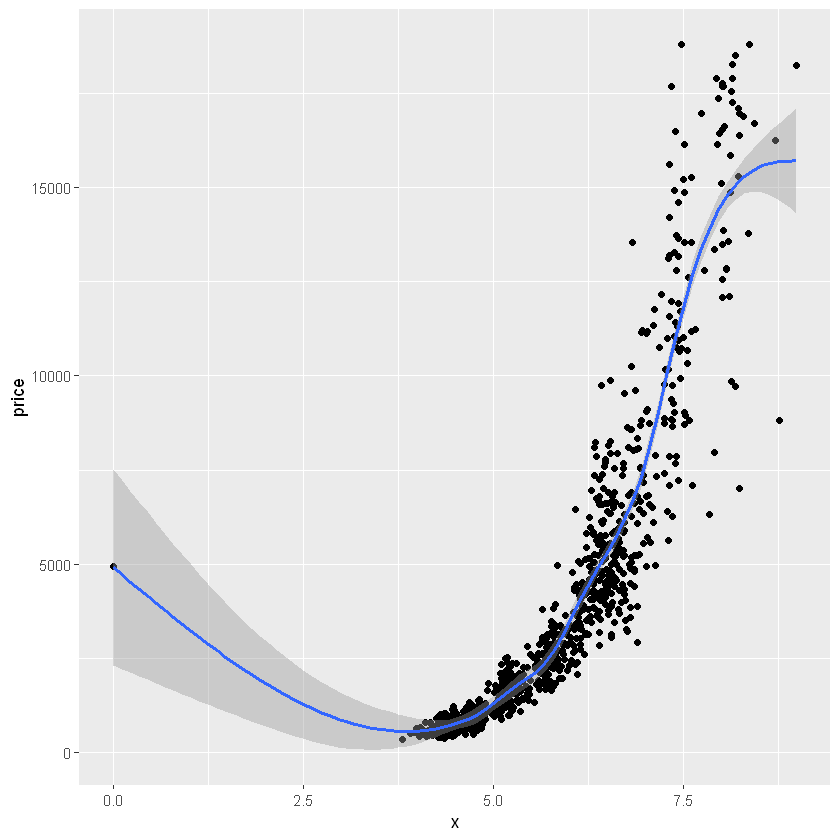

In [11]:
ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price)) +
    geom_smooth(mapping = aes(x = x, y = price))



    How to reduce the code duplication above? "(x=x, y=price)" is in both lines. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



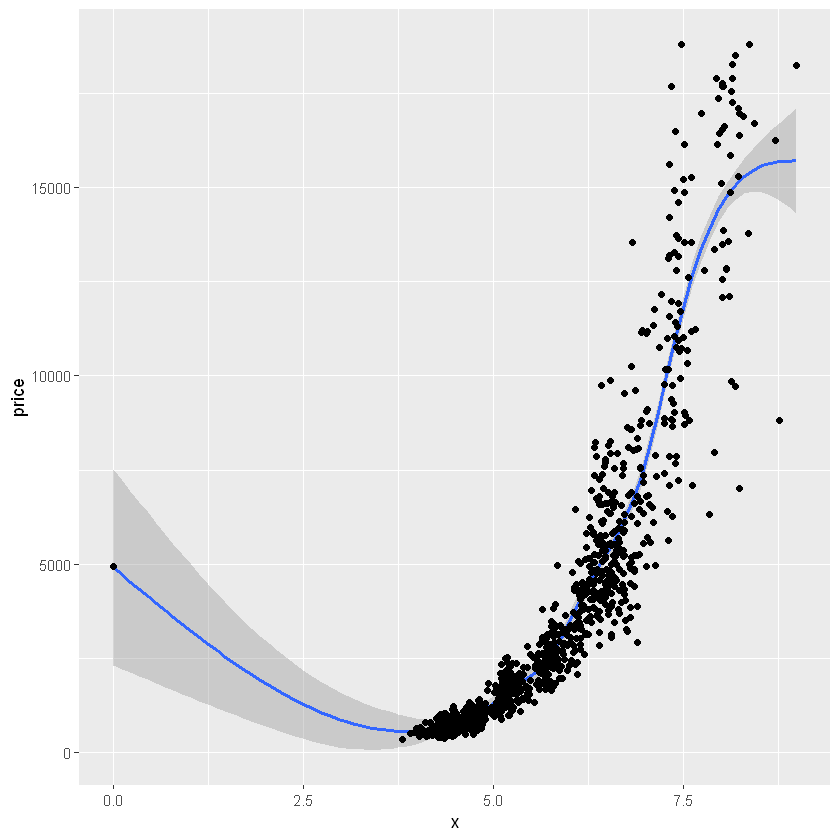

In [12]:
ggplot(data = dm, mapping = aes(x = x, y= price)) + 
  geom_smooth() +   
  geom_point()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



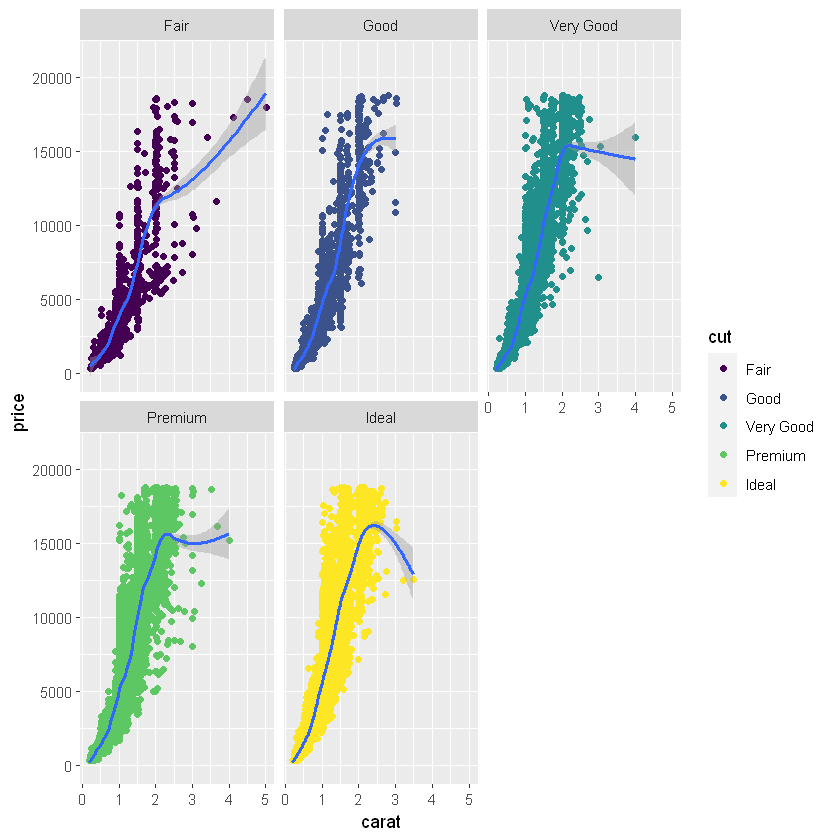

In [13]:
# We can even combine stacked graphs and faceted graphs.
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) +
  geom_point(mapping = aes(color = cut)) +
  geom_smooth() + 
  facet_wrap(~ cut, nrow = 2)

# Exercise 

Recreate this graph 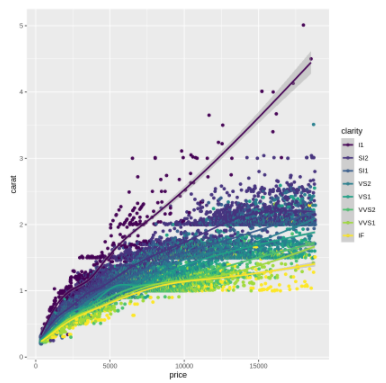

## Geometric Objects

**Geoms** are the  visual objects used to plot the data.
Bar charts use geom_bar,
Line charts use geom_line,
Boxplots use geom_boxplot,
Scatterplots use geom_point, etc.

Every geom will take some sort of mapping argument but the number of variables depends on what kind of plot you are plotting. Similarly, not all of the asthetics will work for all plots (you cannot change the shape of a line... etc.)

To find what asethetics will work for a given graph type, put a question mark in front of it.





In [14]:
?geom_point

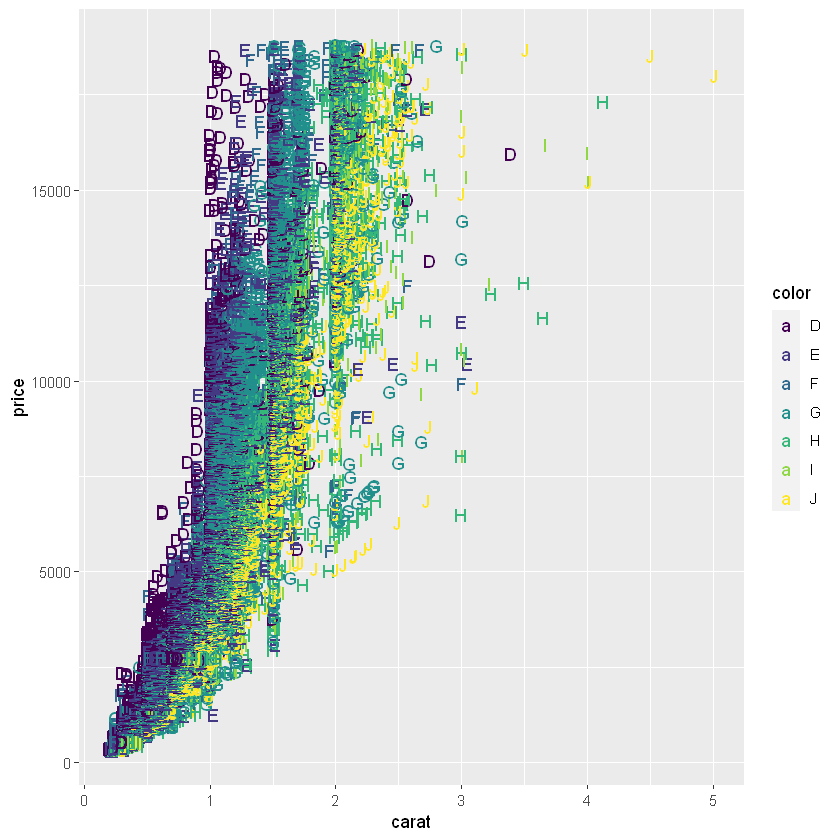

In [15]:
#text plot of carat vs. price with each point the letter of the color
ggplot(data = diamonds) +
  geom_text(mapping = aes(x = carat, y = price, label = color, color =color))

Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, `?geom_bar` shows that the default value for stat is 'count', which means that `geom_bar()` uses `stat_count()`. Compare to `geom_point()` which uses `stat= "identity"`

`stat_count()` is documented on the same page as `geom_bar()`, and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.

In [16]:
?geom_bar

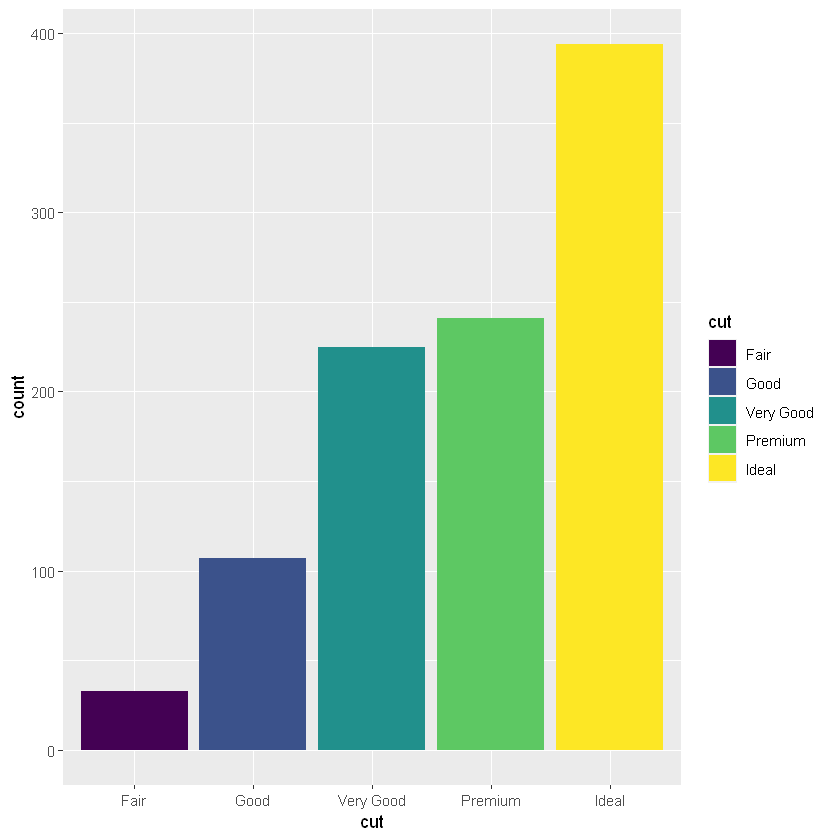

In [17]:
#Using default for geom_bar- stat = "count"
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, fill = cut))

Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).

In [18]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

popn

country,population
<chr>,<dbl>
ETHIOPIA,1.02e+08
NIGERIA,1.86e+08
EGYPT,9.60e+07
DR CONGO,7.80e+07
SOUTH AFRICA,5.60e+07


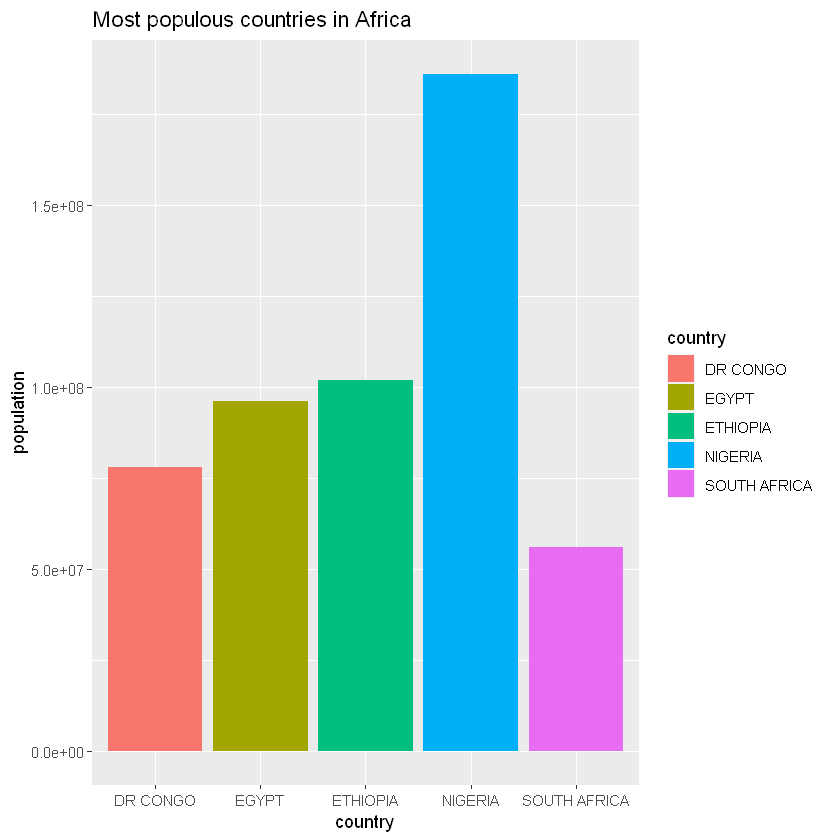

In [19]:
#Overwriting default stat = "count" since our data is count data
ggplot(data = popn) +
  geom_bar(mapping = aes(x = country, y = population, fill = country), stat = "identity") +
  ggtitle('Most populous countries in Africa')

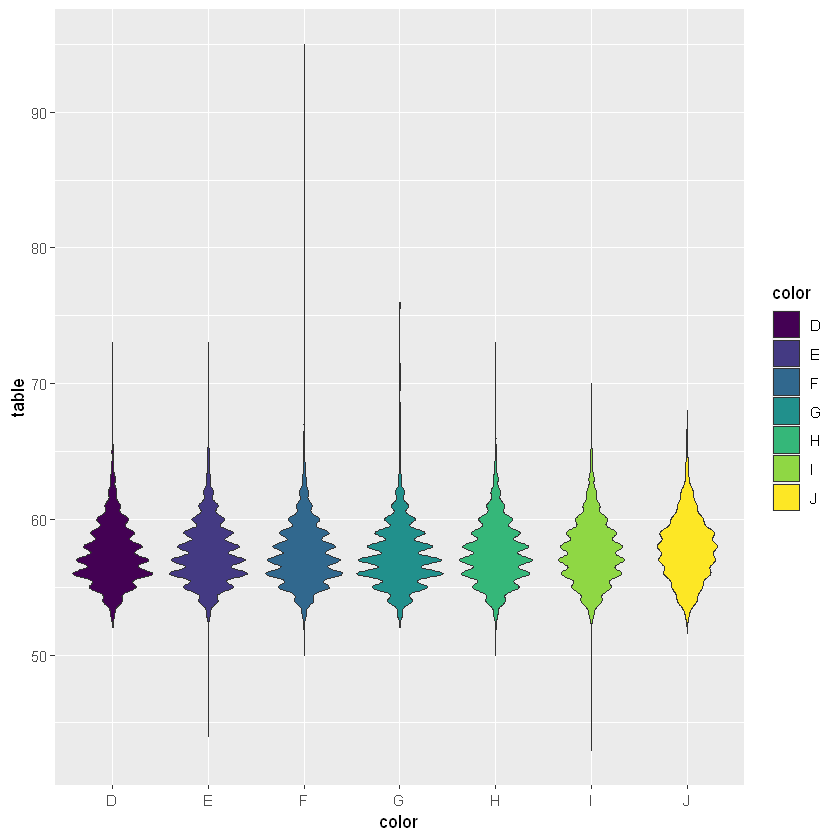

In [20]:
#Violin plots of table, seperated by color
ggplot(data = diamonds) +
  geom_violin(mapping = aes(y = table, x=color, fill = color))
  ?geom_violin

### Exercise
    1. What does geom_col() do? How is it different to geom_bar()?
    (Most geoms and stats come in pairs that are almost always used in concert. You may find it interesting to read through the documentation and make a list of all the pairs.)

In [21]:
?geom_col

In [22]:
?geom_bar

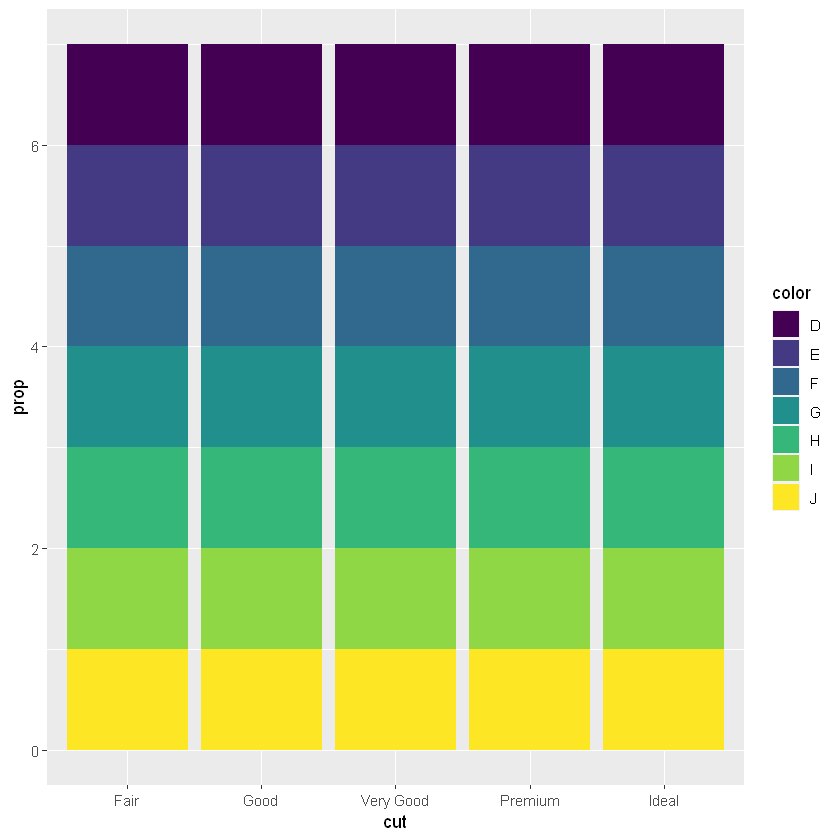

In [23]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop..))

## Position adjustments

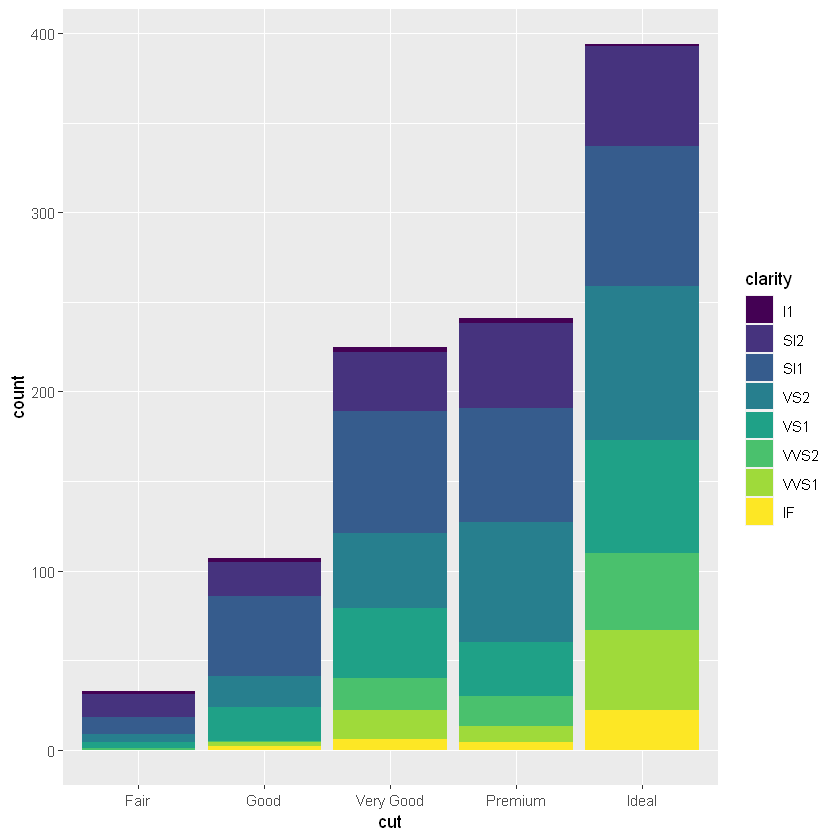

In [24]:
ggplot(data = dm) +
    geom_bar(mapping = aes(x = cut, fill = clarity)) # this "fill" is different from the following one.

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

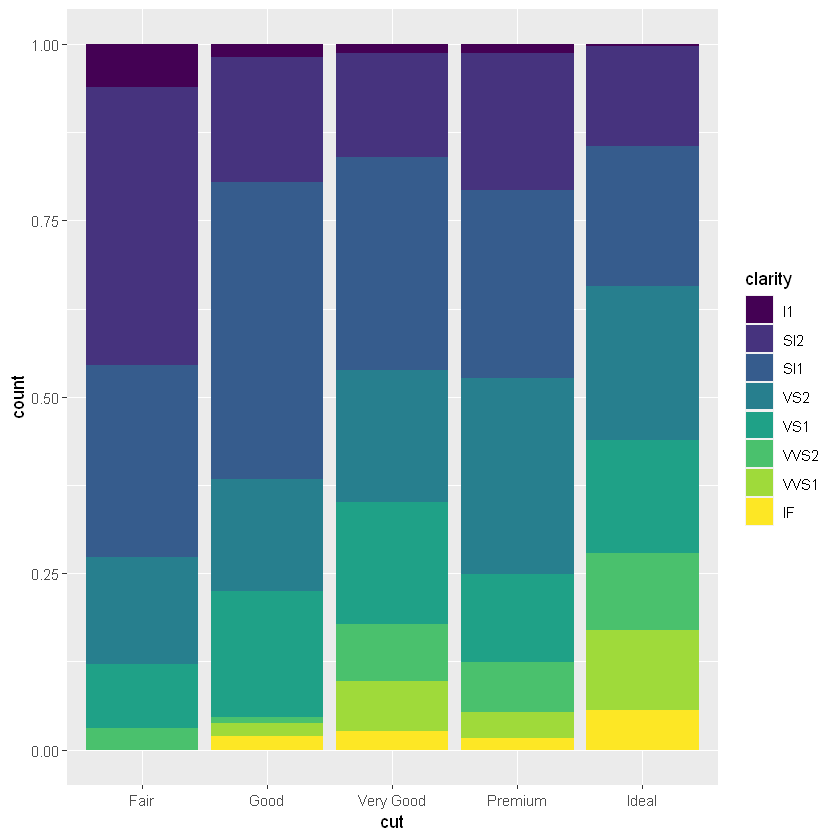

In [25]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

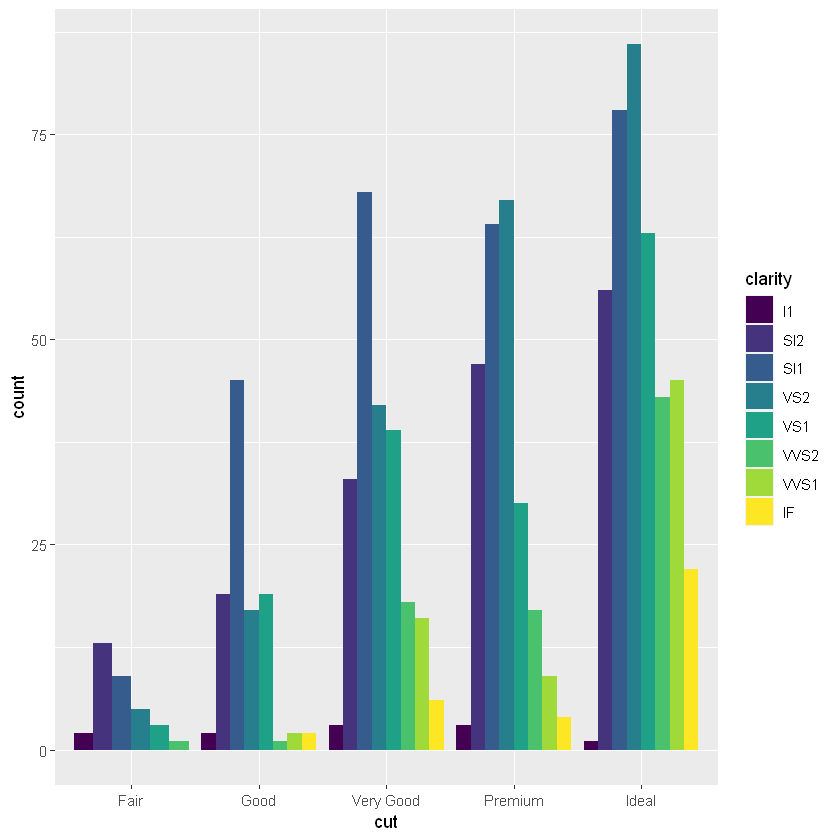

In [26]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

### Exercise
What does the positional adjustment 'jitter'  to the following scatter plot?

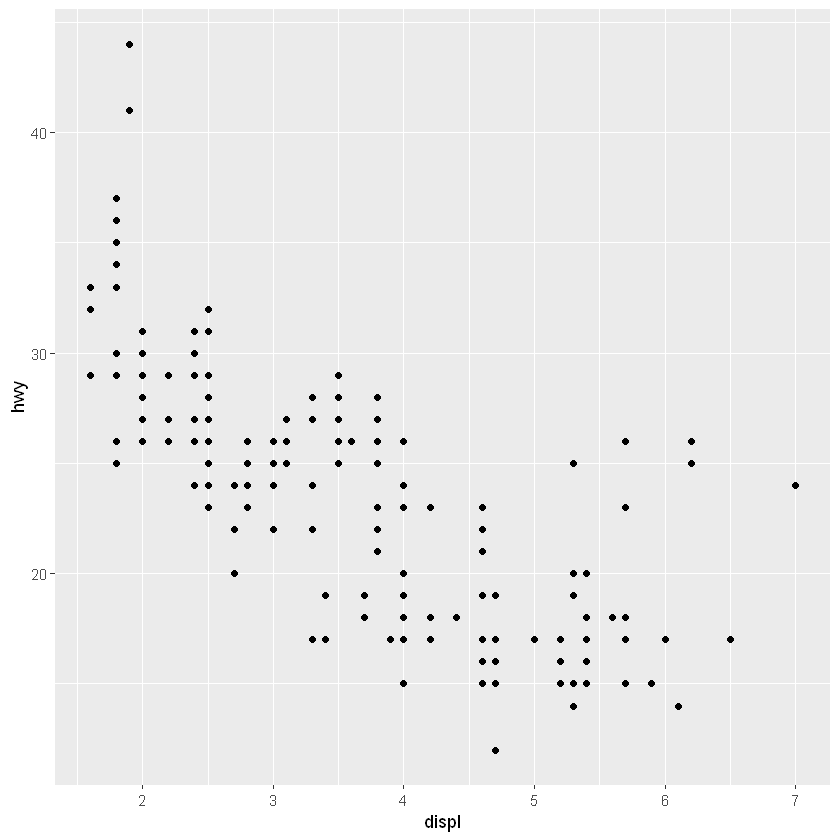

In [27]:
#original
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

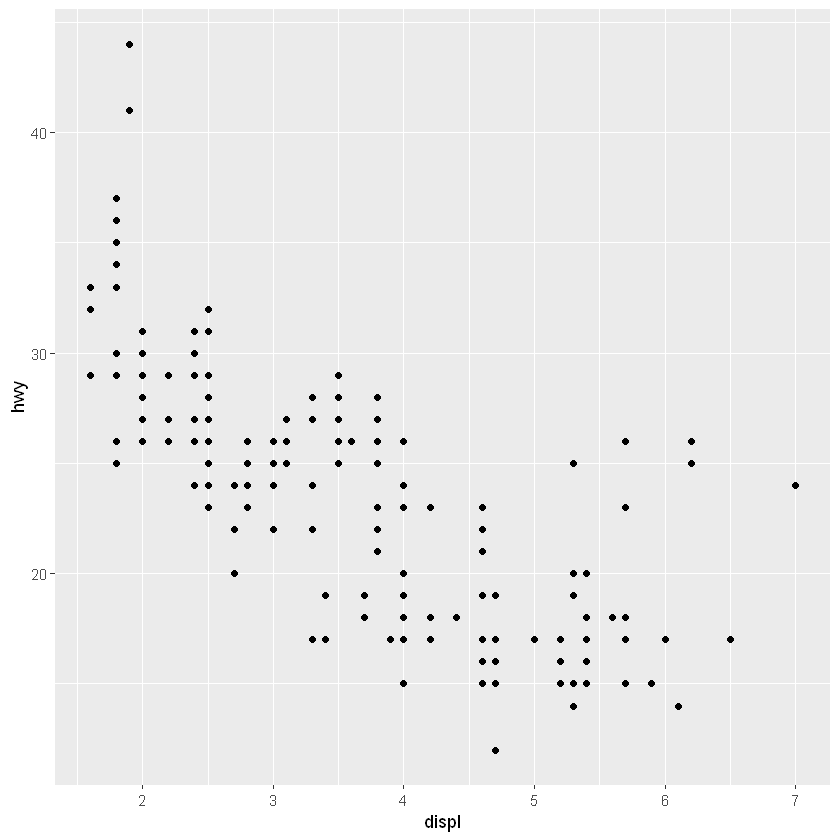

In [28]:
#add positional argument jitter
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

## Coordinate Systems


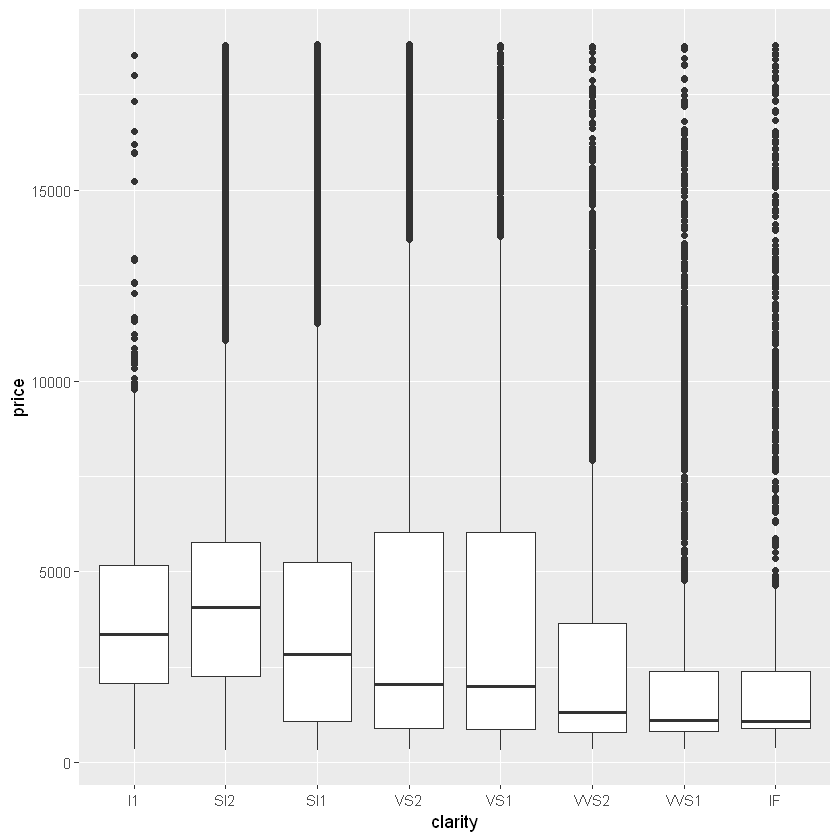

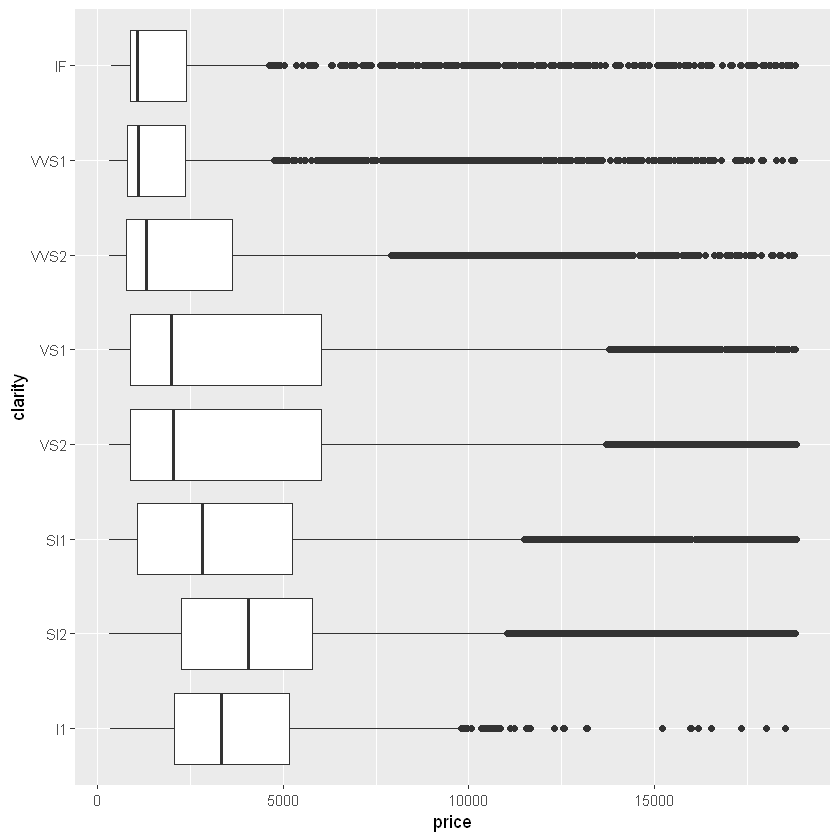

In [29]:
#coord_flip:
ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(x = clarity, y = price))

  #coord_flip:
ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(x = clarity, y = price)) +
  coord_flip()

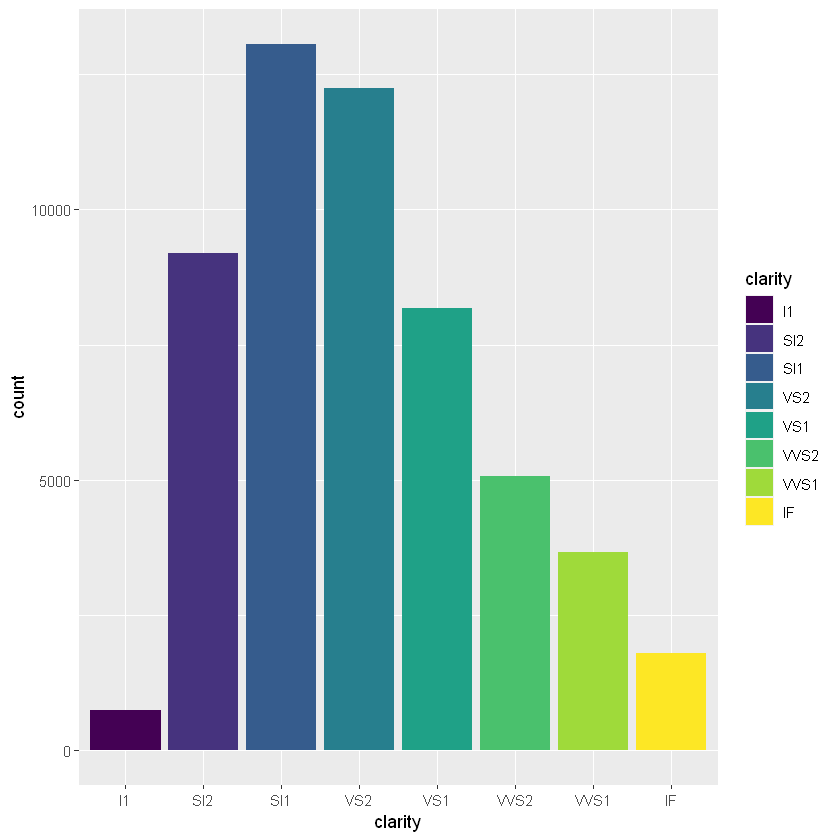

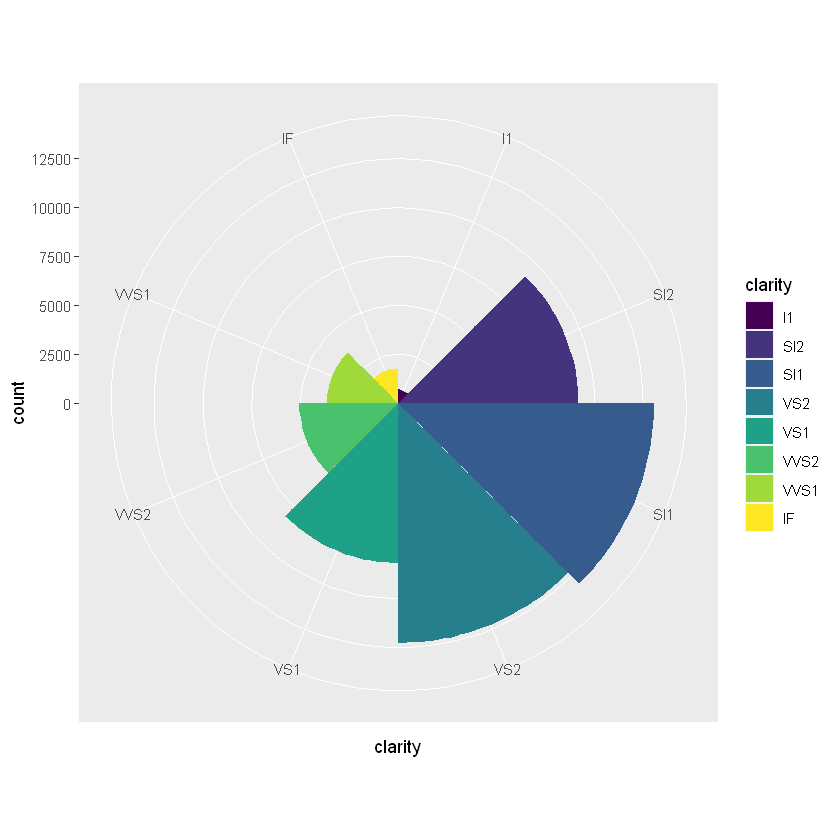

In [30]:
#coord_polar
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = clarity, fill = clarity))

ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = clarity, fill = clarity), width = 1) +
  coord_polar()

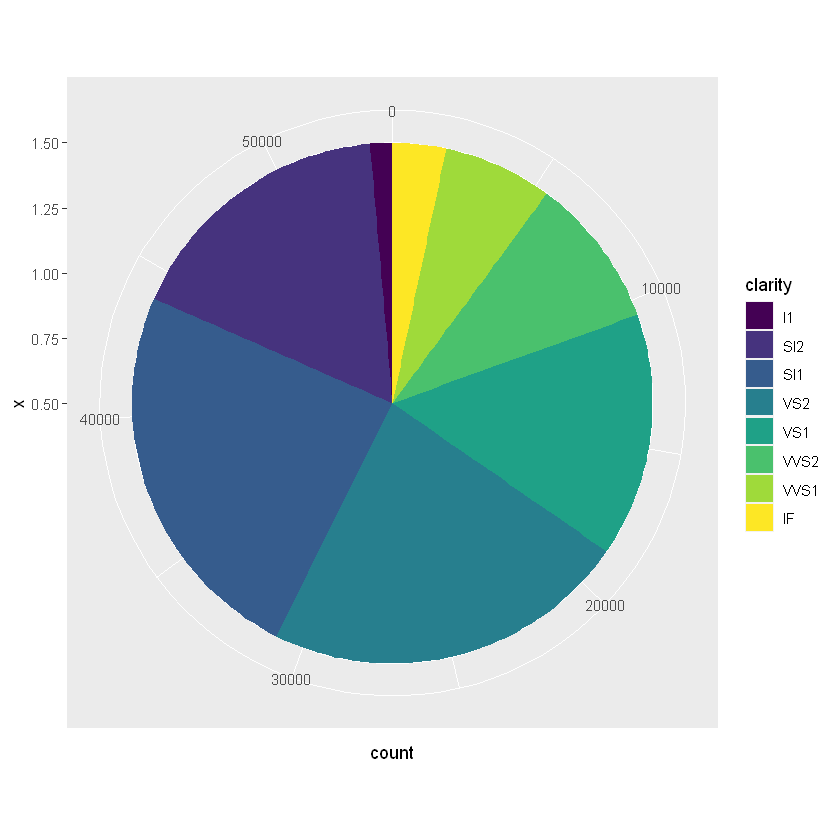

In [31]:
#pie chart
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = 1, fill = clarity), width = 1) +
  coord_polar(theta = "y")

## Creating a Plot

You can now create any plot using this formula.

`#Graph a basic plot.
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION> +
  <LABS>`
  
  Cheatsheet: https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf



# dplyr for data manipulation

In [32]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.35,Premium,F,VS2,60.9,57,879,4.58,4.55,2.78
0.90,Premium,I,VS2,60.1,59,3663,6.37,6.25,3.79
0.31,Ideal,E,VVS2,62.0,54,864,4.38,4.39,2.72
1.05,Ideal,F,SI2,60.3,55,4987,6.55,6.68,3.99
0.71,Premium,J,SI1,62.4,61,1690,5.68,5.63,3.53
0.50,Ideal,G,SI2,60.7,56,1180,5.13,5.18,3.13


Simply run 'dm' after declaring the dm variable above. can you guess what 'dbl', 'ord', and 'int' are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [33]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [34]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
sizes

[1] "M"   "S"   "S"   "M"   "XL"  "XXL" "XL"  "S"   "M"   "L"

In [35]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes) # in R Studio, this will output the ordering explicitly with less-than signs

[1] "S"   "M"   "L"   "XL"  "XXL"

**dplyr basics**
5 key dplyr verb functions:
*    Pick observations by their values (filter()).
*    Reorder the rows (arrange()).
*    Pick variables by their names (select()).
*    Create new variables with functions of existing variables (mutate()).
*    Collapse many values down to a single summary (summarise()).

All of these can be used with group_by() which changes the function from operating on the whole dataset to operating on each group.


All of these verb functions work the same:

   `verb(\<dataframe>, \<what to do with the data frame>) = a new data frame`

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [36]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.74,Fair,J,I1,64.9,61,8807,8.76,8.66,5.65


Usually you want to store the newly subsetted data in memory. 

In [37]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [38]:
4 == 6
test = 6
test
test == 5
test == 6


[1] FALSE

[1] 6

[1] FALSE

[1] TRUE

## Use cases

In [39]:
a = filter(dm, color == 'D' | color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & color == 'J') 
# filtering for rows that satisfy both conditions

best_cuts = filter(dm, cut == 'Ideal') 
# filtering using membership condition

not_worst_cuts = filter(dm, cut > 'Fair') 
# can do this because cut is an ordinal variable

In [40]:
not_worst_cuts[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.35,Premium,F,VS2,60.9,57,879,4.58,4.55,2.78
0.90,Premium,I,VS2,60.1,59,3663,6.37,6.25,3.79
0.31,Ideal,E,VVS2,62.0,54,864,4.38,4.39,2.72
1.05,Ideal,F,SI2,60.3,55,4987,6.55,6.68,3.99
0.71,Premium,J,SI1,62.4,61,1690,5.68,5.63,3.53
0.50,Ideal,G,SI2,60.7,56,1180,5.13,5.18,3.13
2.11,Ideal,I,SI1,62.0,55,15282,8.23,8.18,5.09
0.40,Ideal,I,VVS2,62.0,56,1035,4.77,4.74,2.95
0.60,Ideal,D,SI1,61.7,56,2263,5.39,5.44,3.34


In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [66]:
x = 4
x == NA
is.na(x)
y = NA
y == NA
is.na(y)

[1] NA

[1] NA

[1] NA

[1] NA

In [ ]:
NA > 5
10 == NA
NA + 10
NA / 2

In [ ]:
NA==NA

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [42]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [43]:
filter(df, x>1 | x == NA)

x
<dbl>
3


In [44]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3


### Exercise: 
Why is NA ^ 0 not missing? Why is NA | TRUE not missing? Why is FALSE & NA not missing? Can you figure out the general rule? (NA * 0 is a tricky counterexample!)

In [67]:
NA * 0

[1] NA

**Logical operators**

If you use multiple arguments, seporated by a ',' you are using the and opporator, everything in both arguments must be true. You can also use the & sign to signify this.

Other symbols: '&' and, '|' or, '!' not, xor(x,y) one or the other but not both.

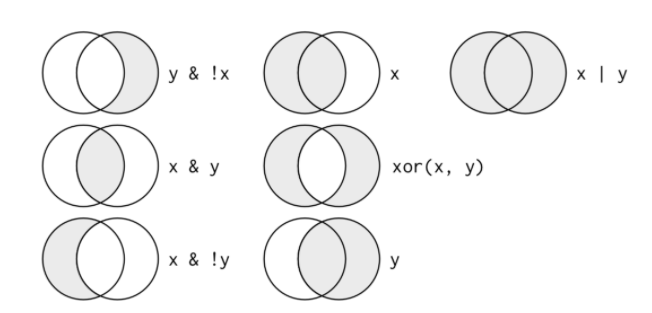

In [ ]:
#filter all ideal and premium diamonds
the_best_diamonds = filter(diamonds, cut == 'Ideal' | cut == 'Premium')
head(the_best_diamonds)

In [ ]:
#this short hand may seem intuitive, but it doesn't work
#bad example
filter(diamonds, cut == ('Ideal' |'Premium'))

In [ ]:
#however %in% works
head(filter(diamonds, cut %in% c('Ideal', 'Premium')))

### Exercise
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good


2. Write code using filter that wil allow you to output diamonds with even-numbered prices

## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [45]:
arrange(dm, cut, color)[1:20,] # arranges by cut then color

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.02,Fair,D,SI1,66.4,60,4798,6.29,6.21,4.15
0.70,Fair,D,SI1,66.2,57,2550,5.56,5.41,3.63
1.60,Fair,D,SI2,64.7,58,8666,7.35,7.28,4.73
0.70,Fair,D,SI2,65.5,57,1806,5.56,5.43,3.60
0.74,Fair,E,SI2,66.7,62,2617,5.49,5.43,3.64
1.00,Fair,E,VS2,66.4,51,4480,6.31,6.22,4.16
0.56,Fair,E,SI1,64.5,61,1358,5.22,5.09,3.33
0.50,Fair,E,SI1,66.4,58,1196,4.98,4.87,3.27
1.01,Fair,F,SI2,65.2,57,3837,6.33,6.24,4.10


In [46]:
# arranging in the descending order of carat and then cut
arrange(dm,desc(carat), cut)[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.01,Fair,I,SI2,65.8,56,18242,8.99,8.94,5.90
2.74,Fair,J,I1,64.9,61,8807,8.76,8.66,5.65
2.66,Good,H,SI2,63.8,57,16239,8.71,8.65,5.54
2.24,Ideal,I,SI2,61.7,58,16709,8.43,8.37,5.18
2.23,Very Good,G,I1,63.5,57,7006,8.24,8.20,5.22
2.18,Very Good,G,SI2,63.1,58,16878,8.29,8.23,5.21
2.18,Ideal,I,VS2,62.0,57,13769,8.35,8.24,5.14
2.11,Ideal,I,SI1,62.0,55,15282,8.23,8.18,5.09
2.10,Good,H,SI1,63.7,61,12121,8.10,8.07,5.15


Missing values are always sorted at the end:

In [47]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
<dbl>
2
5
NA


In [48]:
arrange(df, desc(x))

x
<dbl>
5
2
NA


### Exercise
1. Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.



## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [49]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [50]:
select(dm, carat, price)[1:20,]

carat,price
<dbl>,<int>
0.35,879
0.90,3663
0.31,864
1.05,4987
0.71,1690
0.50,1180
2.11,15282
0.40,1035
0.60,2263


In [51]:
select(dm, carat:price)[1:20,]

carat,cut,color,clarity,depth,table,price
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>
0.35,Premium,F,VS2,60.9,57,879
0.90,Premium,I,VS2,60.1,59,3663
0.31,Ideal,E,VVS2,62.0,54,864
1.05,Ideal,F,SI2,60.3,55,4987
0.71,Premium,J,SI1,62.4,61,1690
0.50,Ideal,G,SI2,60.7,56,1180
2.11,Ideal,I,SI1,62.0,55,15282
0.40,Ideal,I,VVS2,62.0,56,1035
0.60,Ideal,D,SI1,61.7,56,2263


In [52]:
select(dm, -(carat:price))[1:20,]

x,y,z
<dbl>,<dbl>,<dbl>
4.58,4.55,2.78
6.37,6.25,3.79
4.38,4.39,2.72
6.55,6.68,3.99
5.68,5.63,3.53
5.13,5.18,3.13
8.23,8.18,5.09
4.77,4.74,2.95
5.39,5.44,3.34


Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [53]:
rename(dm, width=x)[1:20,]

carat,cut,color,clarity,depth,table,price,width,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.35,Premium,F,VS2,60.9,57,879,4.58,4.55,2.78
0.90,Premium,I,VS2,60.1,59,3663,6.37,6.25,3.79
0.31,Ideal,E,VVS2,62.0,54,864,4.38,4.39,2.72
1.05,Ideal,F,SI2,60.3,55,4987,6.55,6.68,3.99
0.71,Premium,J,SI1,62.4,61,1690,5.68,5.63,3.53
0.50,Ideal,G,SI2,60.7,56,1180,5.13,5.18,3.13
2.11,Ideal,I,SI1,62.0,55,15282,8.23,8.18,5.09
0.40,Ideal,I,VVS2,62.0,56,1035,4.77,4.74,2.95
0.60,Ideal,D,SI1,61.7,56,2263,5.39,5.44,3.34


In [54]:
select(dm, width = x)[1:20,]

width
<dbl>
4.58
6.37
4.38
6.55
5.68
5.13
8.23
4.77
5.39


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [55]:
select(dm, price, carat, everything())[1:20,]

price,carat,cut,color,clarity,depth,table,x,y,z
<int>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
879,0.35,Premium,F,VS2,60.9,57,4.58,4.55,2.78
3663,0.90,Premium,I,VS2,60.1,59,6.37,6.25,3.79
864,0.31,Ideal,E,VVS2,62.0,54,4.38,4.39,2.72
4987,1.05,Ideal,F,SI2,60.3,55,6.55,6.68,3.99
1690,0.71,Premium,J,SI1,62.4,61,5.68,5.63,3.53
1180,0.50,Ideal,G,SI2,60.7,56,5.13,5.18,3.13
15282,2.11,Ideal,I,SI1,62.0,55,8.23,8.18,5.09
1035,0.40,Ideal,I,VVS2,62.0,56,4.77,4.74,2.95
2263,0.60,Ideal,D,SI1,61.7,56,5.39,5.44,3.34


There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise:
1. Write code that wil have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.



### Mutate
to create a computed column

In [56]:
dm_dimensions = select(dm, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = x*y*z
)[1:20,]

x,y,z,volume
<dbl>,<dbl>,<dbl>,<dbl>
4.58,4.55,2.78,57.93242
6.37,6.25,3.79,150.88938
4.38,4.39,2.72,52.30070
6.55,6.68,3.99,174.57846
5.68,5.63,3.53,112.88375
5.13,5.18,3.13,83.17474
8.23,8.18,5.09,342.66593
4.77,4.74,2.95,66.69891
5.39,5.44,3.34,97.93414


If you only want to keep the new variables, use transmute()

In [57]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:20,]

volume
<dbl>
57.93242
150.88938
52.30070
174.57846
112.88375
83.17474
342.66593
66.69891
97.93414



## Summarise
Generally used in concert with group_by() function to output summaries by group. Group summaries are seen in many applications

In [58]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

color,avg_price
<ord>,<dbl>
D,2702.835
E,3420.017
F,3548.760
G,4264.423
H,4311.048
I,5061.911
J,3947.826


In [59]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [60]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans)))
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
<chr>,<chr>,<dbl>,<fct>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [69]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
head(hwy_summary)

`summarise()` has grouped output by 'manufacturer'. You can override using the `.groups` argument.



manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238


In [70]:
hwy_summary_ag = filter(hwy_summary, 
                        substring(manufacturer,1,1) %in% 
                            c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


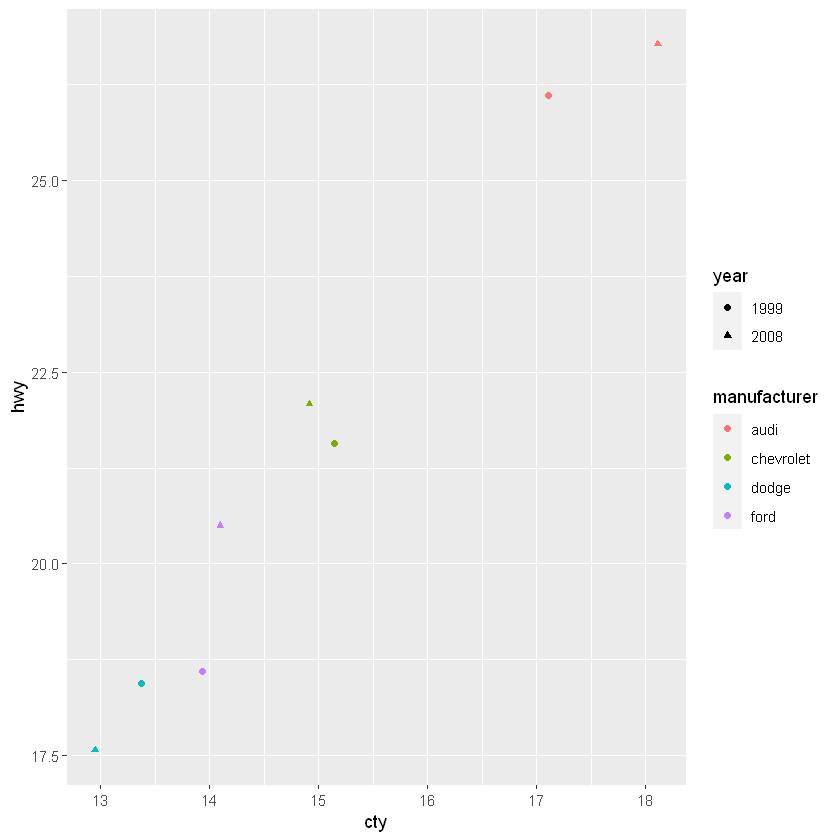

In [71]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
geom_point(mapping = aes(color = manufacturer, shape = year))

## Exercise:
Using the starwars data set, create two subdata sets (using dplyr verbs) and graph something interesting from them.

In [72]:
head(starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


In [65]:
starwars_1 
    

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: ggplot(data = mpg) + 
2:     
  ^


In [ ]:
starwars 2 